Under the life-cycle savings hypothesis, as developed by Franco Modigliani, the savings ratio (aggregate personal savings divided by disposable income) is explained by per-capita disposable income, the percentage rate of change in per-capita disposable income, and two demographic variables: The percentage of population less than 15 years old and the percentage of the population over 75 years old. The data are averaged over the decade 1960–1970 to remove the business cycle or other short-term fluctuations.

The following data was obtained from Belsley, Kuh, and Welsch (1980). They in turn obtained the data from Sterling (1977).

The dataset contains 50 observations with five variables.

| Number | Variables |
| --- | --- |
| I | Sr: numeric, aggregate personal savings|
| II | pop15: numeric, % of the population under 15 |
| III | pop75: numeric, % of the population over 75 |
| IV | dpi: numeric, real per-capita disposable income |
| V | ddpi: numeric, % growth rate of dpi |

In [404]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

In [405]:
df_lcs = pd.read_csv('~/UW/IMT_574/Week7/Homework/data-lifecyclesaving.csv')
df_lcs.head()

,Contry,sr,pop15,pop75,dpi,ddpi
0,Australia,11.43,29.35,2.87,2329.68,2.87
1,Austria,12.07,23.32,4.41,1507.99,3.93
2,Belgium,13.17,23.80,4.43,2108.47,3.82
3,Bolivia,5.75,41.89,1.67,189.13,0.22
4,Brazil,12.88,42.19,0.83,728.47,4.56


1) Use EM for clustering “similar” countries.

In [406]:
#Checking for NaNs
df_lcs.info()
df_lcs.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Contry  50 non-null     object 
 1   sr      50 non-null     float64
 2   pop15   50 non-null     float64
 3   pop75   50 non-null     float64
 4   dpi     50 non-null     float64
 5   ddpi    50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


Contry    False
sr        False
pop15     False
pop75     False
dpi       False
ddpi      False
dtype: bool

In [407]:
#Dropping the Contry column that is not relevant
df_lcs.drop(['Contry'], axis = 1, inplace=True)
#df_lcs.head()

In [408]:
df_lcs_normalized = df_lcs.copy()

for column in df_lcs_normalized.columns: 
    df_lcs_normalized[column] = (df_lcs_normalized[column] - 
                                df_lcs_normalized[column].min()) / (df_lcs_normalized[column].max() - 
                                                                    df_lcs_normalized[column].min())   

In [409]:
df_lcs_normalized.head()

,sr,pop15,pop75,dpi,ddpi
0,0.528293,0.301908,0.557971,0.572647,0.160703
1,0.559512,0.071756,0.929952,0.362655,0.224985
2,0.613171,0.090076,0.934783,0.516114,0.218314
3,0.251220,0.780534,0.268116,0.025605,0.000000
4,0.599024,0.791985,0.065217,0.163439,0.263190


In [ ]:
#Fitting the modelm with a random number of clusters = 3,4,5
model_em_gaussian_3  = GaussianMixture(n_components=3, init_params='random',covariance_type='full')
model_em_gaussian_4  = GaussianMixture(n_components=4, init_params='random',covariance_type='full')
model_em_gaussian_5  = GaussianMixture(n_components=5, init_params='random',covariance_type='full')

clustered_preds_3 = model_em_gaussian_3.fit_predict(df_lcs_normalized)
clustered_preds_4 = model_em_gaussian_4.fit_predict(df_lcs_normalized)
clustered_preds_5 = model_em_gaussian_5.fit_predict(df_lcs_normalized)

In [411]:
def plotter(x, y, clustered_preds, num_clusters, xlabel, ylabel):
    plt.figure()
    plt.title(f'Gaussian Mixture Clusters for number of clusters = {num_clusters}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(x, y, c=clustered_preds, cmap='viridis')

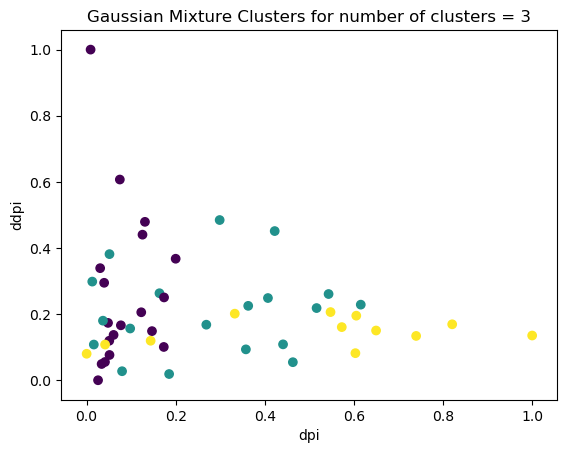

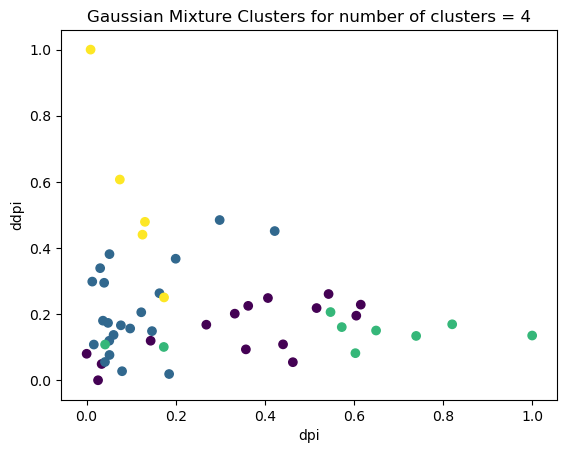

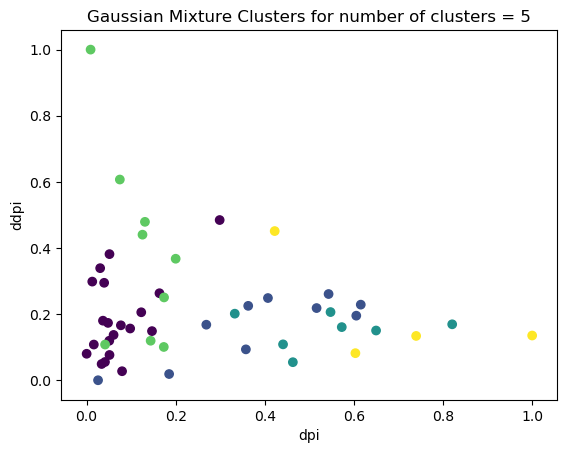

In [412]:
plotter(df_lcs_normalized['dpi'],df_lcs_normalized['ddpi'], clustered_preds_3, 3, 'dpi', 'ddpi')
plotter(df_lcs_normalized['dpi'],df_lcs_normalized['ddpi'], clustered_preds_4, 4, 'dpi', 'ddpi')
plotter(df_lcs_normalized['dpi'],df_lcs_normalized['ddpi'], clustered_preds_5, 5, 'dpi', 'ddpi')

---

2) Report how many groups you got and why you chose that number with the help of AIC and BIC. 

In [413]:
# View the akaike information criterion
print(f'The AIC score of the EM model with 3 clusters is: {model_em_gaussian_3.aic(df_lcs_normalized)}')
print(f'The AIC score of the EM model with 4 clusters is: {model_em_gaussian_4.aic(df_lcs_normalized)}')
print(f'The AIC score of the EM model with 5 clusters is: {model_em_gaussian_5.aic(df_lcs_normalized)}')

print('')

# View the bayesian information criterion
print(f'The BIC score of the EM model with 3 clusters is: {model_em_gaussian_3.bic(df_lcs_normalized)}')
print(f'The BIC score of the EM model with 4 clusters is: {model_em_gaussian_4.bic(df_lcs_normalized)}')
print(f'The BIC score of the EM model with 5 clusters is: {model_em_gaussian_5.bic(df_lcs_normalized)}')

The AIC score of the EM model with 3 clusters is: -158.728838809359
The AIC score of the EM model with 4 clusters is: -194.06922736819706
The AIC score of the EM model with 5 clusters is: -226.58727936318303

The BIC score of the EM model with 3 clusters is: -40.18341247281393
The BIC score of the EM model with 4 clusters is: -35.371317917660974
The BIC score of the EM model with 5 clusters is: -27.73688679865586
